# Проект "Анализ A/B-теста"

**Цель проекта:** Приоритизировать гипотезы, провести A/B-тест и проанализировать результаты.

**Ход исследования:**

1. Загрузка данных и подготовка к анализу.  
2. Приоритизация гипотез.
3. Анализ A/B-теста.  
4. Выводы.


## Загрузка данных и подготовка к анализу

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# настройка вывода 
pd.set_option('display.float_format', '{:.2f}'.format)
#colors = sns.color_palette('pastel')
pd.options.display.max_colwidth = 130

### Загрузка данных

In [3]:
try:
    hypothesis, orders, visitors = (
           pd.read_csv('/datasets/hypothesis.csv'),  
           pd.read_csv('/datasets/orders.csv'),  
           pd.read_csv('/datasets/visitors.csv')  
    )

except:
    hypothesis, orders, visitors = (
           pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv'),  
           pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv'),  
           pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')  
    )

In [5]:
# функция для просмотра данных о дф
def description(x):
    display('Первые строки таблицы:')
    display(x.head())
    print('*'*50)
    display('Общая информации о данных:')
    display(x.info())
    print('*'*50)
    display('Распределение численных показателей:')
    display(x.describe())
    print('*'*50)
    display('Проверка на дубликаты:')
    display(x.duplicated().sum())    

### Предобработка и обзор данных  
  
* **hypothesis.csv**

In [6]:
description(hypothesis)

'Первые строки таблицы:'

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


**************************************************


'Общая информации о данных:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

**************************************************


'Распределение численных показателей:'

,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


**************************************************


'Проверка на дубликаты:'

0

Дано: датафрейм с 9 строками. Дубликатов нет, пропусков нет, типы данных корректные, надо перевести названия столбцов в нижний регистр.

In [7]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


* **orders.csv**

In [8]:
description(orders)

'Первые строки таблицы:'

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


**************************************************


'Общая информации о данных:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

**************************************************


'Распределение численных показателей:'

,transactionId,visitorId,revenue
count,1197.00,1197.00,1197.00
mean,2155621385.53,2165960143.10,8348.01
std,1229084904.76,1236014192.15,39191.13
min,1062393.00,5114589.00,50.00
25%,1166775572.00,1111826046.00,1220.00
50%,2145193898.00,2217984702.00,2978.00
75%,3237740112.00,3177606451.00,8290.00
max,4293855558.00,4283872382.00,1294500.00


**************************************************


'Проверка на дубликаты:'

0

Дано: датафрейм с 1197 строками. Дубликатов нет, пропусков нет. Надо скорректировать тип данных в столбце date, названия столбцов.

In [9]:
orders['date'] = pd.to_datetime(orders['date'])

In [10]:
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})
#orders.columns
#orders.info()

In [11]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [12]:
orders.groupby('group', as_index=False).agg({'visitor_id':'nunique'})

,group,visitor_id
0,A,503
1,B,586


Пользователи разделены на две группы: A и B, группа В больше примерно на 16%, что не совсем корректно. Величина выручки имеет большой разброс: от 50 до 1294500 у.е.

* **visitors.csv**

In [13]:
description(visitors)

'Первые строки таблицы:'

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**************************************************


'Общая информации о данных:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

**************************************************


'Распределение численных показателей:'

,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


**************************************************


'Проверка на дубликаты:'

0

Дано: датафрейм с 62 строками. Дубликатов нет, пропусков нет, названия столбцов корректные. Надо скорректировать тип данных в столбце date.

In [14]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [15]:
print('Самая ранняя дата наблюдения:', visitors['date'].min())
print('Последняя дата наблюдения:', visitors['date'].max())

Самая ранняя дата наблюдения: 2019-08-01 00:00:00
Последняя дата наблюдения: 2019-08-31 00:00:00


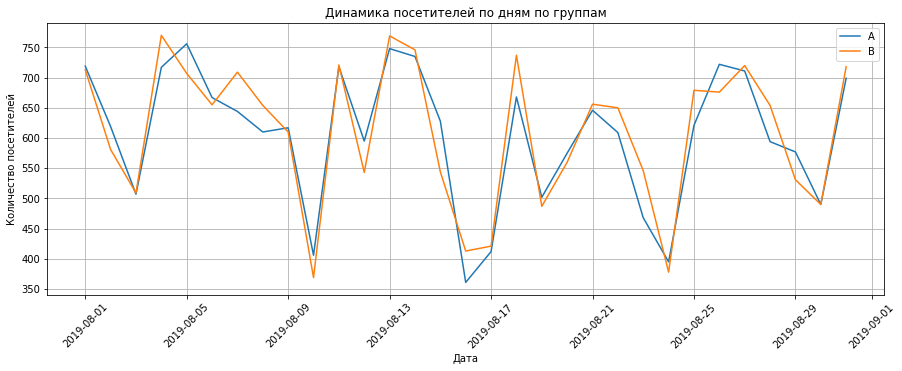

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(visitors[visitors['group'] == 'A']['date'], visitors[visitors['group']=='A']['visitors'], label='A')
plt.plot(visitors[visitors['group'] == 'B']['date'], visitors[visitors['group']=='B']['visitors'], label='B')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.title("Динамика посетителей по дням по группам")
plt.ylabel("Количество посетителей")
plt.xlabel("Дата")
plt.show()

В целом динамика посетителей совпадает в обеих группах, циклична, колеблется примерно от 360 до 770 посетителей/день. 

**Вывод:** 
* Файл с гипотезами `hypothesis.csv`: имеются данные о 9 гипотезах, для каждой гипотезы проведена оценка параметров reach, impact, confidence, efforts по 10-балльной шкале. Тип данных корректный, названия столбцов приведены к нижнему регистру, пропуски и дубликаты не обнаружены.

* Файл с данными о заказах `orders.csv`: 1197 строк с данными об id заказа, пользователей, сделавшем заказ, дате, выручке и группе A/B-теста, в которую попал заказ. Пропусков и дубликатов нет, скорректирован тип данных в столбце с датой заказа, названия столбцов. Пользователи разделены на две группы: A и B, группа В больше примерно на 16%.

* Файл с данными о посещениях/активности пользователей `visitors.csv`: 62 строки c данными об активности пользователей за период с 01.08.2019 по 31.08.2019 в каждой из групп теста. Названия столбцов корректны, пропусков нет, скорректирован тип данных в столбце с датой.

## Приоритизация гипотез

### ICE scoring
Применим модель ICE для приоритизации гипотез.

In [17]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Следующие гипотезы получили самые высокие приорететы:  
* Гипотеза № 9: "Запустить акцию, дающую скидку на товар в день рождения";  
* Гипотеза № 1: "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей";  
* Гипотеза № 8: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

Фреймворк **ICE** приоритизирует гипотезы с учетом 3 параметров:  
* Параметр Impact показывает, насколько сильно изменение повлияет на охваченных пользователей.  
* Параметр Confidence показывает, насколько вы уверены в оценках других параметров.  
* Параметр Efforts показывает, насколько сложно проверить гипотезу.

### RICE scoring
Применим модель RICE для приоритизации гипотез.

In [18]:
hypothesis['rice'] = hypothesis['reach']* hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Вывод: При применении модели RICE для приоритизации гипотез самые высокие приорететы получили гипотезы:  
* Гипотеза № 8: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";  
* Гипотеза № 3: "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"; 
* Гипотеза № 1: "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей";
* Гипотеза № 7: "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".


Фреймворк **RICE** приоритизирует гипотезы с учетом 3 параметров:  
* Параметр Impact показывает, насколько сильно изменение повлияет на охваченных пользователей.  
* Параметр Confidence показывает, насколько вы уверены в оценках других параметров.  
* Параметр Efforts показывает, насколько сложно проверить гипотезу.
* Параметр Reach показывает, скольких пользователей затронет вносимое изменение.

**Вывод:**  
В отличие от ICE, фреймворк RICE учитывает дополнительно охват пользователей, которых затронет вносимое изменение. Так, гипотеза № 9 о запуске акции, дающей скидку на товар в день рождения, с учетом охвата пользователей получает куда более низкие рейтинги, т.к. охватывает небольшую группу пользователей.  
Таким образом, наиболее перспективными гипотезами можно считать следующие:  
* Гипотеза № 8: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";  
* Гипотеза № 1: "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей";  
* Гипотеза № 7: "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".

## Анализ A/B-теста

Перед проведением анализа A/B-теста проверим данные на корректность, в частности нет ли попадания одних и тех же пользователей в разные группы.

In [19]:
# список пользователей, попавших в группу А
visitors_A = orders[orders['group'] == 'A']['visitor_id'].unique()
# список пользователей, попавших в группу В
visitors_B = orders[orders['group'] == 'B']['visitor_id'].unique()
# пересечения списков
visitors_AB = np.intersect1d(visitors_A, visitors_B)
visitors_AB
# len(visitors_AB)

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [20]:
display(orders[orders['visitor_id'] == 1404934699])
len(visitors_AB)

,transaction_id,visitor_id,date,revenue,group
406,1441855393,1404934699,2019-08-03,26980,B
1036,2890600501,1404934699,2019-08-09,8340,B
1044,1814628689,1404934699,2019-08-11,8640,A


58

Некоторые пользователи (58) попали одновременно в обе группы тестирования, что некорректно, т.к. сама суть тестирования в том, что пользователь может состоять только в одной группе. Несмотря на потерю данных, считаю необходимым удалить этих пользователей из анализа.

In [21]:
orders = orders[orders['visitor_id'].isin(list(visitors_AB)) != True]
len(orders)

1016

In [22]:
orders.groupby('group', as_index=False).agg({'visitor_id':'nunique'})

,group,visitor_id
0,A,445
1,B,528


### Кумулятивная выручка по группам

In [23]:
orders_a_daily = orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
                .groupby('date', as_index=False)\
                .agg({'transaction_id':pd.Series.nunique, 'revenue': 'sum'})
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']
#ordersA_daily.head()
orders_a_cumm = orders_a_daily.apply(
                                    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']]\
                                        .agg({
                                            'date': 'max', 
                                            'orders_per_date_a': 'sum', 
                                            'revenue_per_date_a': 'sum'}
                                            ),
                                    axis=1
                                    ).sort_values(by=['date'])
orders_a_cumm.columns = ['date','orders_cumm_a','revenue_cumm_a']


orders_b_daily = orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
                .groupby('date', as_index=False)\
                .agg({'transaction_id':pd.Series.nunique, 'revenue': 'sum'})
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cumm = orders_b_daily.apply(
                                    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']]\
                                        .agg({
                                            'date': 'max', 
                                            'orders_per_date_b': 'sum', 
                                            'revenue_per_date_b': 'sum'}
                                            ),
                                    axis=1
                                    ).sort_values(by=['date'])
orders_b_cumm.columns = ['date','orders_cumm_b','revenue_cumm_b']

In [24]:
#visitors.head()

In [25]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cumm = visitors_a_daily.apply(
                                        lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']]\
                                        .agg({'date': 'max', 'visitors_per_date_a': 'sum'}), axis=1
                                        )
visitors_a_cumm.columns = ['date', 'visitors_cumm_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cumm = visitors_b_daily.apply(
                                        lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']]\
                                        .agg({'date': 'max', 'visitors_per_date_b': 'sum'}), axis=1
                                        )
visitors_b_cumm.columns = ['date', 'visitors_cumm_b']

In [26]:
# собираем все вместе
data = (
    orders_a_daily
    .merge(orders_b_daily, left_on='date', right_on='date', how='left')
    .merge(orders_a_cumm, left_on='date', right_on='date', how='left')
    .merge(orders_b_cumm, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cumm, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cumm, left_on='date', right_on='date', how='left')
)
data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cumm_a,revenue_cumm_a,orders_cumm_b,revenue_cumm_b,visitors_per_date_a,visitors_per_date_b,visitors_cumm_a,visitors_cumm_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


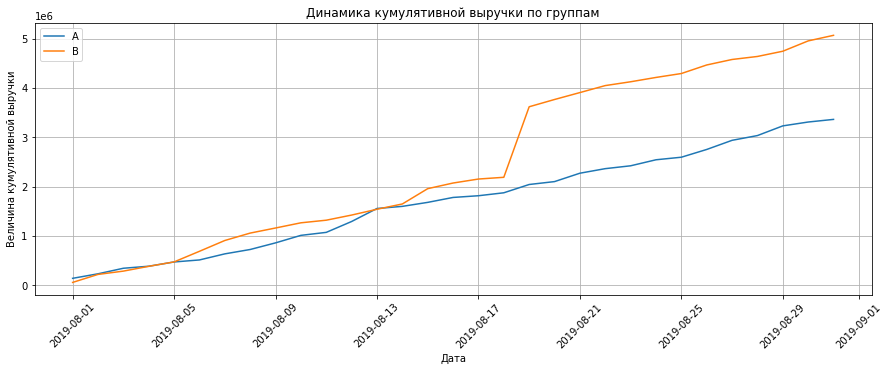

In [27]:
plt.figure(figsize=(15, 5))
plt.plot(data['date'], data['revenue_cumm_a'], label="A")
plt.plot(data['date'], data['revenue_cumm_b'], label="B")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.title('Динамика кумулятивной выручки по группам')
plt.ylabel('Величина кумулятивной выручки')
plt.xlabel('Дата')
plt.show()

**Вывод:** В первые две недели выручка в обеих группах была примерно одинаковой, в районе 17.08. наблюдается резкий рост выручки в группе B. Причиной может быть либо появление каких-то очень дорогих заказов, либо увеличение их общего числа в этот период времени.

### Кумулятивный средний чек по группам

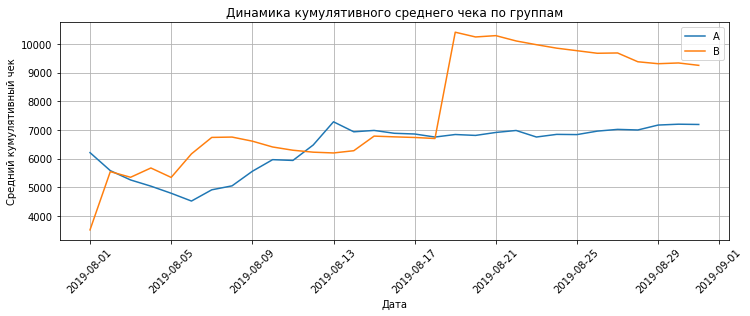

In [28]:
plt.figure(figsize=(12, 4))
plt.plot(data['date'], data['revenue_cumm_a']/data['orders_cumm_a'], label="A")
plt.plot(data['date'], data['revenue_cumm_b']/data['orders_cumm_b'], label="B")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.title('Динамика кумулятивного среднего чека по группам')
plt.ylabel('Средний кумулятивный чек')
plt.xlabel('Дата')
plt.show()

**Вывод:** В группе А в самом начале наблюдается спад, но потом величина кумулятивного среднего чека начинает плавно расти и стабилизируется. В группе В средний кумулятивный чек как и кумулятивная выручка резко возрастает после 17.08, а после наблюдается плавное падение величины в этой группе. Возможной причиной является появление ощутимо более дорогих заказов в указанный период.

### Относительное изменение кумулятивного среднего чека группы B к группе A

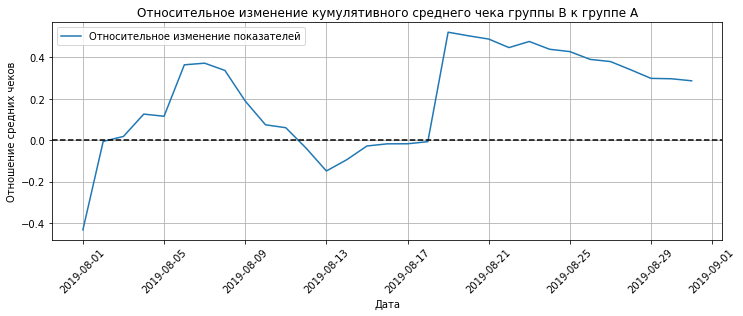

In [29]:
plt.figure(figsize=(12, 4))
# отношение средних чеков
plt.plot(data['date'],\
         (data['revenue_cumm_b']/data['orders_cumm_b']) / (data['revenue_cumm_a']/data['orders_cumm_a']) -1,\
         label='Относительное изменение показателей')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.ylabel('Отношение средних чеков')
plt.xlabel('Дата')
plt.show()

**Вывод:** Средний чек пользователей группы B практически всегда превышает средний чек пользователей группы А. Причиной опять же скорее всего является наличие каких-то аномально дорогих заказов в группе В, выявленных ранее.

### Кумулятивное среднее количество заказов на посетителя по группам

In [30]:
#data.head()

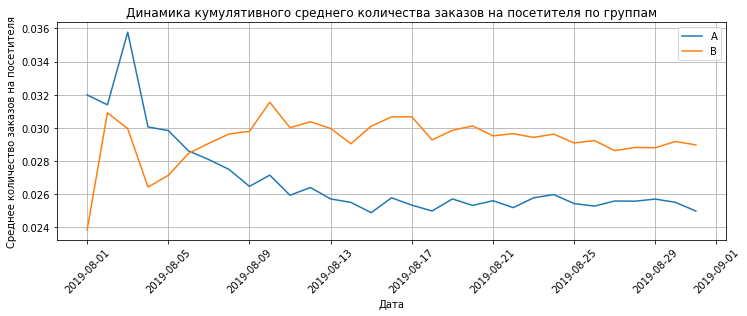

In [31]:
plt.figure(figsize=(12, 4))
plt.plot(data['date'], data['orders_cumm_a']/data['visitors_cumm_a'], label="A")
plt.plot(data['date'], data['orders_cumm_b']/data['visitors_cumm_b'], label="B")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.title('Динамика кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.show()

**Вывод:** В начале периода наблюдения среднее количество заказов на пользователя в группе А было выше, но потом ощутимо снизилось. В группе В наоборот после спада в первые дни наметился рост показателя, который в последствии стабилизировался. В целом кумулятивное среднее количество заказов на посетителя в группе В превышеает аналогичный показатель для группы А.

### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

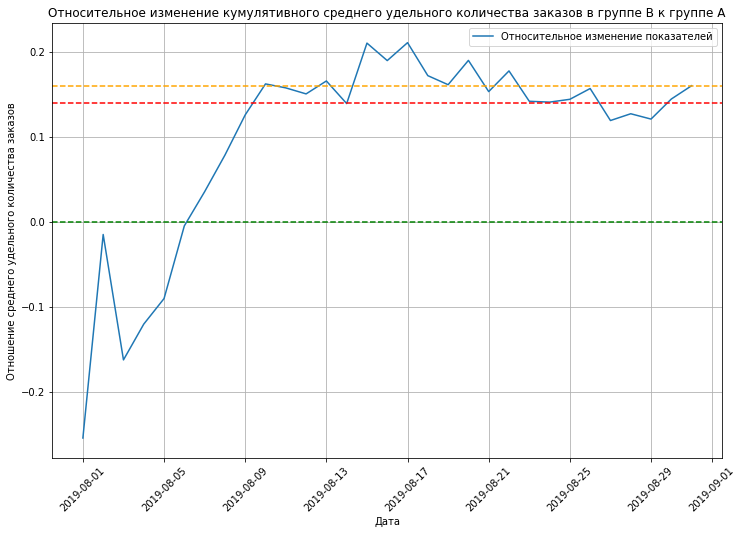

In [32]:
plt.figure(figsize=(12, 8))
plt.plot(data['date'],\
         (data['orders_cumm_b']/data['visitors_cumm_b']) / (data['orders_cumm_a']/data['visitors_cumm_a']) - 1,\
         label='Относительное изменение показателей')
plt.axhline(y=0, color='green', linestyle='--')
plt.axhline(y=0.14, color='red', linestyle='--')
plt.axhline(y=0.16, color='orange', linestyle='--')

plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.title('Относительное изменение кумулятивного среднего удельного количества заказов в группе B к группе A')
plt.ylabel('Отношение среднего удельного количества заказов')
plt.xlabel('Дата')
plt.show()

**Вывод:** В начале периода проведения теста показатели конверсии группы В были хуже показателей группы А. Однако позже относительный прирост среднего количества заказов на посетителя в группе Б превышал аналогичный показатель группы А в среднем на 15%.

###	Точечный график количества заказов по пользователям

In [33]:
#orders.head()

In [34]:
orders_by_users = orders.groupby('visitor_id', as_index=False)\
                        .agg({'transaction_id': 'nunique'})\
                        .sort_values(by='transaction_id', ascending=False)
orders_by_users.columns =  ['visitor_id', 'orders']

display(orders_by_users['orders'].describe())

count   973.00
mean      1.04
std       0.24
min       1.00
25%       1.00
50%       1.00
75%       1.00
max       3.00
Name: orders, dtype: float64

С учетом ранее удаленных пользователей (которые попали в обе группы тестирования), распределение количества заказов по пользователям выглядит весьма неплохо: 1-3 на человека. Однако стоит посмотреть, какое количество пользователей совершило 3 заказа.

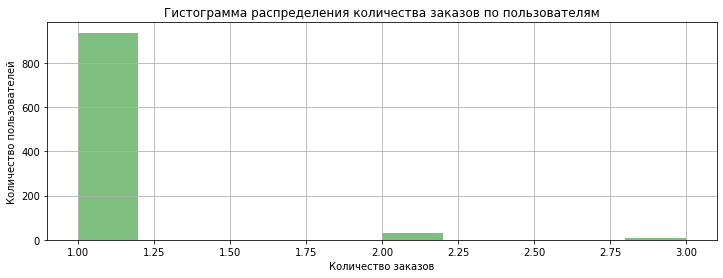

In [35]:
# гистограмма распределения числа заказов по пользователям
plt.figure(figsize=(12, 4))
plt.hist(orders_by_users['orders'], alpha=0.5, color='green')
plt.grid()
plt.title("Гистограмма распределения количества заказов по пользователям")
plt.ylabel("Количество пользователей")
plt.xlabel("Количество заказов")
plt.show()

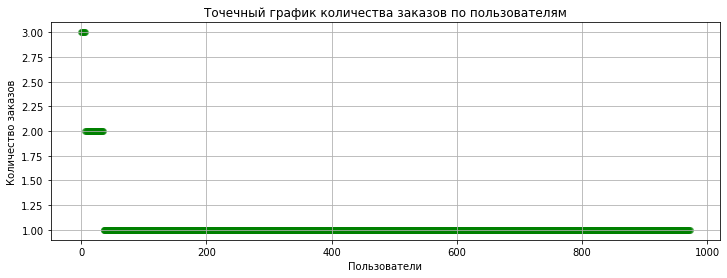

In [36]:
x_values = pd.Series(range(0, len(orders_by_users)))
plt.figure(figsize=(12, 4))
plt.scatter(x_values, orders_by_users['orders'], color='green', alpha=0.5)
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.grid()

plt.show()

**Вывод:** По гистограмме и точечному графику четко видно, что в основном пользователи делали по одному заказу, совсем редко - два, крайне редко - 3.

### 95-й и 99-й перцентили количества заказов на пользователя 

Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [37]:
print(np.percentile(orders_by_users['orders'], [95, 99])) 

[1. 2.]


**Вывод:** Не более 5% пользователей оформляли больше 1 заказа. И всего 1% пользователей совершил более 2 заказов. Таким образом, аномальными пользователями можно считать тех, кто совершил более 1 заказа.

###	Точечный график стоимостей заказов

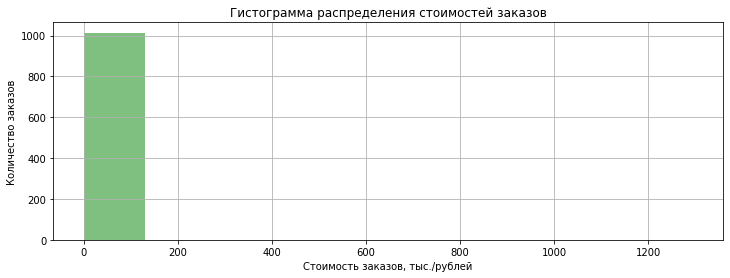

In [38]:
plt.figure(figsize=(12, 4))
plt.hist(orders['revenue']/1000, alpha=0.5, color='green') 
plt.grid()
plt.title('Гистограмма распределения cтоимостей заказов')
plt.ylabel('Количество заказов')
plt.xlabel('Стоимость заказов, тыс./рублей')
plt.show()

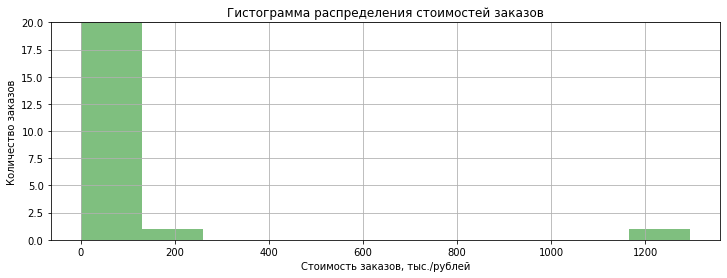

In [39]:
# покрупнее
plt.figure(figsize=(12, 4))
plt.hist(orders['revenue']/1000, alpha=0.5, color='green') 
plt.grid()
plt.ylim(0,20)
plt.title('Гистограмма распределения cтоимостей заказов')
plt.ylabel('Количество заказов')
plt.xlabel('Стоимость заказов, тыс./рублей')
plt.show()

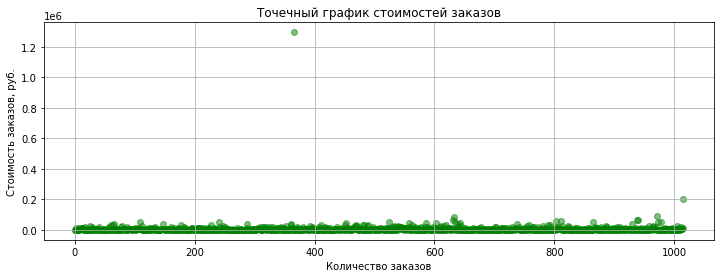

In [40]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12, 4))
plt.scatter(x_values, orders['revenue'], color='green', alpha=0.5)
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказов, руб.')
plt.xlabel('Количество заказов')
plt.grid()
plt.show();

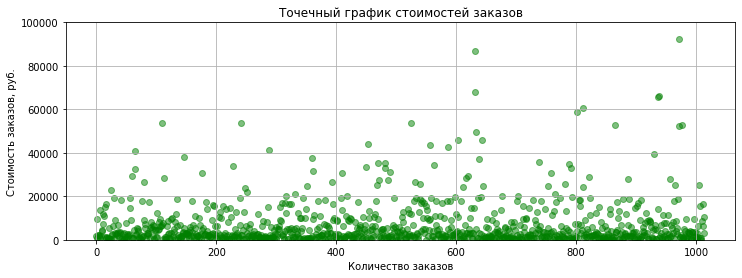

In [41]:
# покрупнее
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12, 4))
plt.scatter(x_values, orders['revenue'], color='green', alpha=0.5)
plt.ylim(0, 100000)
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказов, руб.')
plt.xlabel('Количество заказов')
plt.grid()
plt.show();

**Вывод:** Основное количество заказов находится в пределах 20-25 тыс. рублей, есть дорогие заказы (свыше 60 тыс. рублей). *Предварительно* аномальными можно считать заказы дороже 25-40 тыс. рублей.

###	Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.


In [42]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


**Вывод:** Не более 5% заказов дороже 26785 рублей и всего 1% заказов дороже 53904 руб. Таким образом, к аномальным можно отнести заказы дороже 26785 руб.

###	Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.  

Сформулируем нулевую и альтернативную гипотезы:  
**H0**: Различий в среднем количестве заказов между группами нет.  
**H1**: Различия в среднем количестве заказов между группами есть.


In [43]:
#data.head()
#orders.head()

Создадим переменные `orders_by_users_a` и `orders_by_users_b` со столбцами ['user_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [44]:
orders_by_users_a = (
                     orders[orders['group'] == 'A']
                     .groupby('visitor_id', as_index=False)
                     .agg({'transaction_id': pd.Series.nunique})
                    )
orders_by_users_a.columns = ['visitor_id', 'orders']
orders_by_users_b = (
                     orders[orders['group'] == 'B']
                    .groupby('visitor_id', as_index=False)
                    .agg({'transaction_id': pd.Series.nunique})
                    )
orders_by_users_b.columns = ['visitor_id', 'orders']

Объявим переменные `sample_a` и `sample_b`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [45]:
# Переменные, в ктр. пользователям с заказами будет соответствовать число заказов пользователя,
# а пользователям без заказов — нули
sample_a = pd.concat([orders_by_users_a['orders'],\
                      pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])),\
                                name='orders')], axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],\
                      pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])),\
                                name='orders')], axis=0) 

Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой.

In [46]:
# рассчет статистической значимости различия конверсии по результатам теста Манна-Уитни
print('p-value =', 
      '{0:.3f}'.format(stats.mannwhitneyu(sample_a, sample_b)[1]))

# рассчет относительного различия в конверсии между группами
print('Относительное различие в средней конверсии между группами по «сырым» данным:',
      '{0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

p-value = 0.011
Относительное различие в средней конверсии между группами по «сырым» данным: 0.160


**Вывод:** P-value = 0.011 меньше уровня статистической значимости 0,05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет А и В по "сырым" данным, отвергаем. Средняя конверсия пользователей группы В больше средней конверсии по группе А на 16%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным  

Посчитаем статистическую значимость различий в среднем чеке заказв между группами по «сырым» данным — без удаления аномальных пользователей.  

Сформулируем нулевую и альтернативную гипотезы:  
**H0**: Различий в среднем чеке между группами нет.  
**H1**: Различия в среднем чеке между группами есть.  

Для расчета статистической значимости различий в среднем чеке передадим критерию mannwhitneyu() данные о выручке с заказов. Дополнительно найдём относительные различия в среднем чеке между группами.

In [47]:
print('p-value =',
      '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))

print('Относительное различие в среднем чеке между группами по «сырым» данным:', 
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.829
Относительное различие в среднем чеке между группами по «сырым» данным: 0.287


**Вывод:** 
P-value 0.829, что больше 0.05, а значит, нет причин отвергать нулевую гипотезу об отсутствии статистически значимых различий между чеками групп. 
При этом по расчетам по "сырым" данным средний чек по группе В выше, чем по группе А. Это связано с появлением аномально дорогих заказов в группе В в районе 17.08. После очистки данных от выбросов, относительное различие скорректируется.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Ранее мы нашли, что 95-й и 99-й перцентили средних чеков равны 26 785 и 53 904 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 1 и 2 заказам на пользователя.   
  
Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «очищенным» данным, после удаления аномальных пользователей.  Сформулируем нулевую и альтернативную гипотезы:  
**H0:** Различий в среднем количестве заказов между группами нет.  
**H1:** Различия в среднем количестве заказов между группами есть.  

Примем за аномальных пользователей тех, кто совершил 2 и более заказа или совершил заказ дороже 27 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.  
Сделаем срезы пользователей с числом заказов более 2 — `users_with_many_orders` и пользователей, совершивших заказы дороже 27 000 — `users_with_expensive_orders`. Объединим их в таблице `abnormal_users`. Дополнительно узнаем, сколько всего аномальных пользователей методом shape().

In [48]:
many_orders = np.percentile(orders_by_users['orders'], [95, 99])[1]
exp_orders = np.percentile(orders['revenue'], [95,99])[0]
display(many_orders, exp_orders)

2.0

26785.0

In [49]:
users_with_many_orders = pd.concat(
                                    [
                                        orders_by_users_a[orders_by_users_a['orders'] >= many_orders]['visitor_id'],\
                                        orders_by_users_a[orders_by_users_a['orders'] >= many_orders]['visitor_id'],
                                    ], axis = 0
                                    )


users_with_expensive_orders = orders[orders['revenue'] > exp_orders]['visitor_id']

abnormal_users = (
                    pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0)
                    .drop_duplicates()
                    .sort_values()
                 )
display(abnormal_users.head(5))
print('Количестно аномальных пользователей:', abnormal_users.shape[0])

568     113298937
1099    148427295
928     204675465
684     358944393
36      366673373
Name: visitor_id, dtype: int64

Количестно аномальных пользователей: 68


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста/


In [50]:
sample_a_filtered = pd.concat([
    orders_by_users_a[np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))]['orders'],
    pd.Series(0, 
              index = np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), 
              name='orders')
    ], axis=0)

sample_b_filtered = pd.concat([
    orders_by_users_b[np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))]['orders'],
    pd.Series(0, 
              index = np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])),
              name='orders')
    ], axis=0)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [51]:
# рассчет статистической значимости различия конверсии по результатам теста Манна-Уитни
print('p-value =', 
      '{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

# рассчет относительного различия в конверсии между группами
print('Относительное различие в средней конверсии между группами по «очищенным» данным:', 
      '{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

p-value = 0.003
Относительное различие в средней конверсии между группами по «очищенным» данным: 0.265


**Вывод:** После очистки данных от аномальных значений общие выводы сохраняются: величина p-value снизилась с 0.011 до 0.003, нулевую гипотезу об отсутствии статистически значимых различий в среднем числе заказов между группами А и В по "очищенным" данным также отвергаем. При этом ощутимо возрасло относительное различие в средней конверсии между группами: с 0.16 до до 0.265.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Проверим, как изменились результаты тестирования после очистки данных в разрезе различий в среднем чеке между группами. Посчитаем статистическую значимость различий в среднем чеке заказв между группами по «очищенным» данным.  
Сформулируем нулевую и альтернативную гипотезы:  
**H0:** Различий в среднем чеке между группами по "очищенным" данным нет.  
**H1:** Различия в среднем чеке между группами по "очищенным" данным есть.

Для расчета статистической значимости различий в среднем чеке передадим критерию mannwhitneyu() данные о выручке с заказов. Дополнительно найдём относительные различия в среднем чеке между группами.


In [52]:
print('p-value:',
      '{0:.3f}'.format(stats.mannwhitneyu(
          orders[np.logical_and(orders['group'] == 'A', 
                                np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'], 
          orders[np.logical_and(orders['group'] == 'B', 
                                np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1]
                      )
     )

print('Относительное различие в среднем чеке между группами по «очищенным» данным:',
      "{0:.3f}".format(
          orders[np.logical_and(orders['group'] == 'B', 
                                np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()
          /
          orders[np.logical_and(orders['group'] == 'A', 
                                np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean() 
          - 1)
     )

p-value: 0.860
Относительное различие в среднем чеке между группами по «очищенным» данным: -0.030


**Вывод:** После очистки данных от аномальных значений значение P-value = 0.860 все также больше уровня стат. значимости (0,05). Причин отвергать нулевую гипотезу об отсутствии статистически значимых различий между чеками групп по-прежнему нет.  

Относительное различие в среднем чеке между группам после очистки изменилось, средний чек в группе А незначительно (3%) больше чека группе В.

###	Решение по результатам теста

Результатом проведенного A/B-теста может быть одно из следующих решений:  
1. Остановить тест, зафиксировать победу одной из групп.  
2. Остановить тест, зафиксировать отсутствие различий между группами.  
3. Продолжить тест.  

После анализа A/B-теста имеем следующие факты:
* Обнаружены статистически значимые различия по среднему количеству заказов между группами как по "сырым" данным, так и после фильтрации аномалий. Среднее количество заказов на посетителя в группе В превышает аналогичный показатель группы А на 26.5%. 
* При этом нет статистически значимого различия по среднему чеку между группами. После фильтрации данных от аномалий относительное различие в средних чеках составляет всего 3% в пользу группы А.  
* График различия конверсии между группами показал, что в целом результаты группы B лучше группы A, есть тенденция к улучшению. 
* График относительного различия кумулятивного среднего чека показал, что этот показатель для группы B выше, но наметились тенденции к снижению. Причиной разницы оказалось наличие небольшого количества ощутимо крупных (дорогих) заказов. 

Исходя из обнаруженных фактов, считаю, что с учетом наметившегося роста конверсии в группе В **тест следует продолжить**, чтобы лучше отследить в том числе динамику кумулятивного среднего чека. При этом следует обратить внимание на "качество" проведения теста, в т.ч.:
* Количество пользователей в группах не должно отличаться более чем на 0.5%;
* Пользователь, попавший в одну из групп теста, должен оставаться в этой группе до конца проведения теста. Пересечение пользователей разных групп противоречит самой сути А/В-тестирования.


## Общий вывод

На основании предоставленных данных, была выполнена приоритезация гипотез, проведен анализ A/B-тестирования, получены следующие выводы и рекомендации: 
1. Наиболее перспективными гипотезами можно считать следующие:  
 * Гипотеза № 8: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";  
 * Гипотеза № 1: "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей";  
 * Гипотеза № 7: "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".

2. По итогам анализа А/В-теста обнаружено относительное увеличение среднего количества заказов на пользователя в группе В по отношению к аналогичному показателю группы А на 26,5%. Относительное различие в среднем чеке между группами незначительное: средний чек в группе А на 3% выше чека в группе В. Рекомендуется продолжить проведение теста, а также обратить внимание на распределение пользователей по группам (они не должны пересекаться, количество  пользователей в группах не должно отличаться более чем на 0.5%).